# INTRODUCCIÓN:
### El análisis de 'ingresos' de las personas puede tener múltiples puntos de vista, permitiendo abarcar distintos propósitos como pueden ser modelados socioeconómicos de población, politicas sociales y fiscales para los estados, análisis crediticios para entidades bancarias, segmentación de clientes para entes privados que ofrecen bienes y/o servicios, investigación académica que sirven como apoyo a otros interesados. Por estos motivos es una variable de gran interés para los actores sociales a nivel mundial, por lo que en este trabajo de análisis se buscará predecir si una persona puede ganar mas de 50000 dolares o menos en un año.

### Identificar las variables que influyen sobre el ingreso de las personas es crucial para poder predecir cúal será el valor de ingreso del individuo, en este caso la predicción será de caracter binario y el modelo deberá predecir si una persona obtiene un ingreso mayor o igual a 50000 dolares o menor que esta cifra.
### El objetivo principal será construir un modelo de clasificación que de como resultado los valores antes mencionados. Para lograr dicho modelo se estudiará un conjunto de datos relacionados con individuos y algunas características/variables que pueden influir en el valor a predecir, realizando un análisis exploratorio de los datos con la finalidad de 'limpiar' y preparar los datos para su posterior utlización en un modelo predictivo.

### En este caso, la finalidad personal, es con fines de aprendizaje en Data Science.

### El conjunto de datos fue obtenido de Kaggle y se encuentran en el siguientee enlace: https://www.kaggle.com/datasets/uciml/adult-census-income

In [130]:
# ANÁLISIS EXPLORATORIO DE LOS DATOS

# Importación de librerías necesarias para trabajar.

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [131]:
df_adult = pd.read_csv('adult.csv',sep=',')
df_adult.head(7)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [132]:
# Descripción de las variables en el dataset:

# age = edad de cada individuo. Variable numérica. No contiene nulos ni valores no asignados a número. Tipo de dato 'int'

# workclass = hace referencia a la relación del individuo con su trabajo. clasificación: 'Private', 'Local-gov', '?', 'Self-emp-not-inc', 
#             'Federal-gov','State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked'](8 clases + nulo identificado como '?')
#             Variable categorica.

# fnlwgt = final weight, variable que hace referencia a un peso que tiene cada individuo, en relacion a su posición socio-economica.
#          Variable numerica.

# education = referencia al tipo y grado de educación adquirido por la persona. clasificación: '11th', 'HS-grad', 'Assoc-acdm', 'Some-college', 
#             '10th','Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate','5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'
#             (16 clases diferentes). Variable categorica.

# educational-num = es una puntuación según el tipo y grado de educación adquirido. clasificación: de 1 a 16. Variable numérica

# marital-status = estado civil. clasificación: 'Never-married', 'Married-civ-spouse', 'Widowed', 'Divorced','Separated', 'Married-spouse-absent',
#                  'Married-AF-spouse' (7 clases diferentes). Variable categorica

# occupation = especificamente de que trabaja. clasificación:'Machine-op-inspct', 'Farming-fishing', 'Protective-serv', '?','Other-service',
#              'Prof-specialty', 'Craft-repair', 'Adm-clerical', 'Exec-managerial', 'Tech-support', 'Sales', 'Priv-house-serv','Transport-moving',
#              'Handlers-cleaners', 'Armed-Forces'. (14 clases + nulo identificado con '?'). Variable categorica.

# relationship: describe la relacion de familia que tiene la persona. clasificación: ['Own-child', 'Husband', 'Not-in-family', 'Unmarried', 'Wife',
#               'Other-relative'] (6 clases). Variable categorica

# race: la raza de la persona. Clasificación: ['Black','White','Asian-Pac-Islander','Other','Amer-Indian-Eskimo'] (5 clases). Variable categorica.

# gender: genero. Clasificación: ['Male', 'Female'] (2 clases). Variable categorica.

# capital-gain: ganancias por ventas de capital en el cual se obtuvo un rendimiento entre la compra y la venta. Variable numerica.

# capital-loss: perdida por ventas de capital en el cual se obtuvo un rendimiento negativo por la compra y venta. Variable numerica.

# hours-per-week: cantidad de horas que trabaja la persona por semana. Variable numerica.

# native-country: país de origen de la persona. clasificación: ['United-States', '?', 'Peru', 'Guatemala', 'Mexico','Dominican-Republic', 
#                'Ireland', 'Germany', 'Philippines','Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam','South', 'Columbia', 'Japan',
#                'India', 'Cambodia', 'Poland','Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal','China', 'Nicaragua',
#                'Honduras', 'Iran', 'Scotland', 'Jamaica','Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece','Trinadad&Tobago',
#                'Outlying-US(Guam-USVI-etc)', 'France','Holand-Netherlands'] (41 clases diferentes + nulo identificado con '?').
#                 Variable categorica.

In [133]:
# Realizamos una visualización de cantidad de filas y columnas que tiene el dataframe completo.

df_adult.shape

(48842, 15)

In [134]:
#Analizamos la existencia de nulos.

df_adult.isnull().value_counts()

age    workclass  fnlwgt  education  educational-num  marital-status  occupation  relationship  race   gender  capital-gain  capital-loss  hours-per-week  native-country  income
False  False      False   False      False            False           False       False         False  False   False         False         False           False           False     48842
Name: count, dtype: int64

In [135]:
# Se observa que no existen valores NaN dentro de las columnas.
# Sin embargo, del analisis de las variables se pudo observar que si existe un valor al cual se puede enteder como nulo, ya que en varias
# columnas se detecta el valor '?', dato que se le asignó al no obtener el valor esperado de dicha columna. Esto lo trataremos como un nulo,
# por lo que convertiremos ese valor a nulo para su tratamiento.

In [136]:
# Conversión del valor '?' a nulo

df_adult.replace('?', pd.NA, inplace=True)
df_adult.head(7)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,<NA>,103497,Some-college,10,Never-married,<NA>,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,<NA>,227026,HS-grad,9,Never-married,<NA>,Unmarried,Black,Male,0,0,40,United-States,<=50K


In [137]:
# Ahora trabajaremos con los nulos para ver la repetitividad de ellos en cada variable.

df_identificando_nulos = df_adult.isnull()
df_identificando_nulos.apply(pd.Series.value_counts)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
False,48842.0,46043,48842.0,48842.0,48842.0,48842.0,46033,48842.0,48842.0,48842.0,48842.0,48842.0,48842.0,47985,48842.0
True,NaN,2799,NaN,NaN,NaN,NaN,2809,NaN,NaN,NaN,NaN,NaN,NaN,857,NaN


In [138]:
# Se identifica una cantidad baja de nulos en relación a la cantidad de datos que se tiene. Si cada nulo estaria en una fila diferente, solo
# sumaría una cantidad de individuos totales con nulos de 6465. A partir de esto sabemos que tenemos nulos solo en las columnas workclass (2799),
# occupation (2809) y native-country (857). Las tres columnas tienen datos de variables categoricas, por lo que se deberá determinar como tratar
# cada caso (eliminar, reemplazar el nulo con algun valor como podría ser la moda, entre otros). En principio sin mas que este analisis se puede
# intuir que son bajas cantidades con respecto al total de datos por lo que quizas se puedan presindir de dichas filas, pero se analizar al momenot
# de trabajar con cada variable.

In [139]:
# A continuación se realiza un analisis preliminar sobre las variables cuantitativas/numéricas de los datos.

df_adult.describe().round(2)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.00,48842.00,48842.00,48842.00,48842.0,48842.00
mean,38.64,189664.13,10.08,1079.07,87.5,40.42
std,13.71,105604.03,2.57,7452.02,403.0,12.39
min,17.00,12285.00,1.00,0.00,0.0,1.00
25%,28.00,117550.50,9.00,0.00,0.0,40.00
50%,37.00,178144.50,10.00,0.00,0.0,40.00
75%,48.00,237642.00,12.00,0.00,0.0,45.00
max,90.00,1490400.00,16.00,99999.00,4356.0,99.00


In [140]:
# Analizamos los resultados de cada variable cuantitativa:

# age: observamos una media y un desvío que permite leer una distribución normal de los datos. Puede observarse un máximo muy alejado de la
#      media por lo que habrá que analizar el caso de supuestos outliers.

# fnlwgt: un caso parecido a la edad. distribución normal de los datos, probabilidad alta de casos de outliers a priori.

# educational-num: distribucion normal de los datos, con la frcuencia de datos acumulada cerca de la media. Alta probabilidad de outliers 
#                  en los valores bajos como los minimos.

# capital-gain: variable atipica con una distribución no normal. El promedio es muy bajo y los cuartiles indican que el 0 es un dato que se 
#                repite en la mayoría de los casos. un maximo extraño, requiere analisis para su compresnsión.

# capital-loss: mismo caso que capitl-gain. El 0 es un dato que se repite en la mayoría de casos.

# hours-per-week: distribución normal de los datos. Max y min muy alejados de la media por lo que existe la posibilidad de outliers.

In [141]:
# Ahora realizamos un analisis preliminar sobre las variables categoricas, para explorar valores unicos, nulos o faltantes y modas.

df_adult.describe(exclude=[np.number])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [142]:
# Analizamos las variables cualitativas:

# worklass: Contienen valores faltantes (2799, 5.7% aprox del total). Moda con un valor superior al 50% de los datos.

# education: No contiene valores faltantes. Moda que representa el 32% de los datos aprox.

# marital-status_ No contiene valores faltantes. Moda que representa el 46% de los datos aprox.

# occupation: Contiene valres faltantes (2809, 5.7% aprox del total).

# relationship: No conteien datos faltantes. Moda que representa el 40.4 de los datos aprox.

# race: No contiene datos faltantes. Moda que representa el 85.5 % de los datos.

# gender: No contiene datos faltantes. Variable binaria. distribución de 67% male - 33% female.

# native-country: Contiene valores faltnates (857, 1.75% aprox del total). Moda que representa el 89.7% de los datos.

# Income: variable target. Binaria.


In [143]:
# Realizamos un analisis de correlación de las variabes numericas.

columnas_numericas = ['age','fnlwgt','educational-num','capital-gain','capital-loss','hours-per-week']
df_adult_numericas = df_adult[columnas_numericas]
df_adult_numericas.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076628,0.030940,0.077229,0.056944,0.071558
fnlwgt,-0.076628,1.000000,-0.038761,-0.003706,-0.004366,-0.013519
educational-num,0.030940,-0.038761,1.000000,0.125146,0.080972,0.143689
capital-gain,0.077229,-0.003706,0.125146,1.000000,-0.031441,0.082157
capital-loss,0.056944,-0.004366,0.080972,-0.031441,1.000000,0.054467
hours-per-week,0.071558,-0.013519,0.143689,0.082157,0.054467,1.000000


In [144]:
# Se observa una baja correlación entre las variables, por lo que se concluye que ninguna de las variables numericas es redundante
# en principio, ahora hay que analizar si existe una relación directa que incida sobre el la variable target para saber su utilidad
# en el modelo.

In [145]:
# ANALISIS GRAFICO DE LOS DATOS

In [146]:
# Comenzamos analizando graficamente la variable 'age', comenzaremos realizando una nueva tabla (dataframe) en el cual vamos a obtener
# que cantidad de personas hay por edad y a su vez discriminado segun la variable target.

In [147]:
df_edades_e_ingreso = df_adult.groupby(['age','income']).size().unstack(fill_value=0).reset_index()
df_edades_e_ingreso.head(5)

income,age,<=50K,>50K
0,17,595,0
1,18,862,0
2,19,1050,3
3,20,1112,1
4,21,1090,6


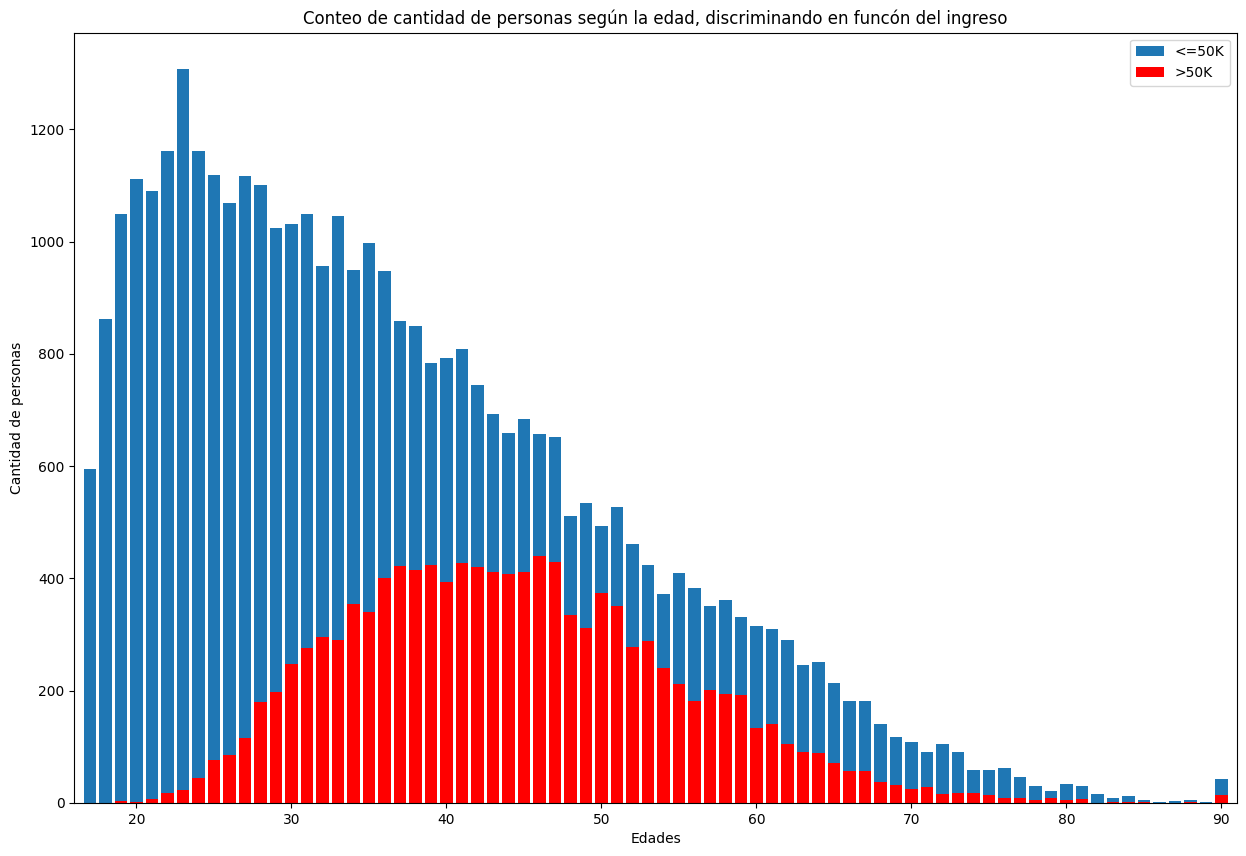

In [148]:
# Paso siguiente procedemos a realizar un grafico de barras en el que se vuelque la información.

fix, ax = plt.subplots(figsize=(15,10))
ax.bar(df_edades_e_ingreso['age'],df_edades_e_ingreso['<=50K'],label='<=50K')
ax.bar(df_edades_e_ingreso['age'],df_edades_e_ingreso['>50K'],label='>50K',color='r')
ax.set_xlim(16,91)
ax.set_xlabel('Edades')
ax.set_ylabel('Cantidad de personas')
ax.set_title('Conteo de cantidad de personas según la edad, discriminando en funcón del ingreso')
ax.legend()

In [149]:
# Distribución normal de los datos. La variable edad e ingreso tienen una relación clara en el gráfico por lo que tendra incidencia en el
# modelo de predicción. Se puede observar una clara decendencia de valores a medida que incrementa la edad, lo que podría indicar la existencia
# de outliers o valores atípicos.

Text(0, 0.5, 'edad')

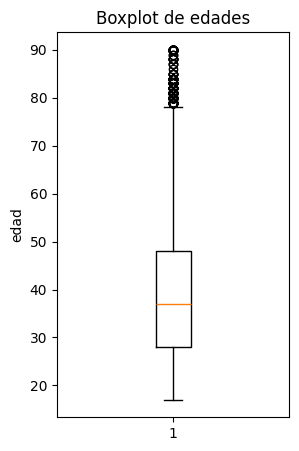

In [150]:

fig, ax = plt.subplots(figsize = (3,5))
ax.boxplot(df_adult['age'])
ax.set_title('Boxplot de edades')
ax.set_ylabel('edad')


In [151]:
# observamos valores atipicos en las edades mas elevadas, por encima de los 78 años, de igual modo, la cantidad acumulada de personas en estos
# valores es poca. Observemos la relación de la variable edad con la variable targuet de ingreso.

In [152]:
# Analizamos la variable categoricas workclass.

workclass_count = df_adult['workclass'].value_counts().reset_index()
workclass_count

,workclass,count
0,Private,33906
1,Self-emp-not-inc,3862
2,Local-gov,3136
3,State-gov,1981
4,Self-emp-inc,1695
5,Federal-gov,1432
6,Without-pay,21
7,Never-worked,10


Text(0.5, 1.0, 'Cantidad de personas según su relación laboral')

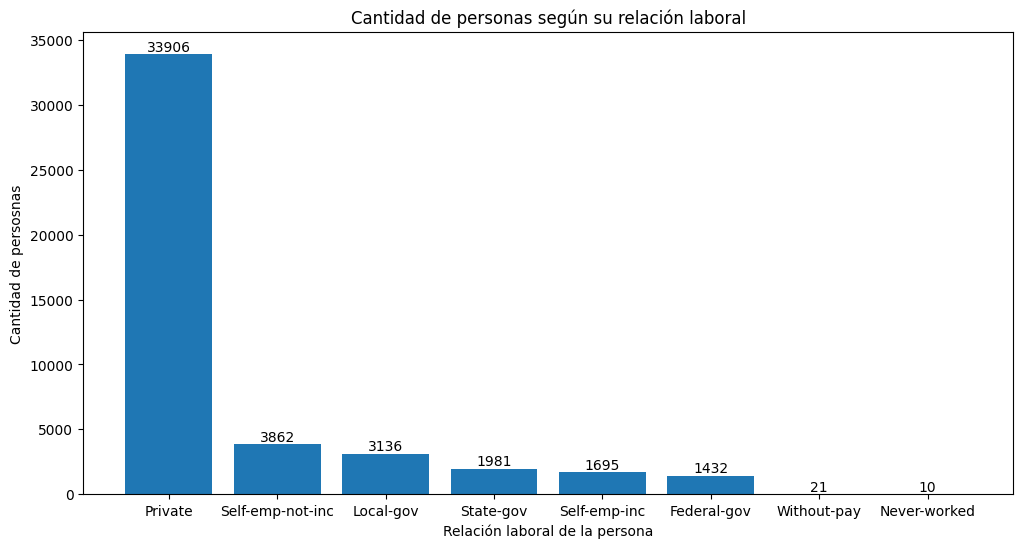

In [153]:
fix, ax = plt.subplots(figsize=(12,6))
ax.bar(workclass_count['workclass'],workclass_count['count'])
for i, count in enumerate(workclass_count['count']):
    plt.text(i, count, str(count), ha='center',va='bottom')
ax.set_xlabel('Relación laboral de la persona')
ax.set_ylabel('Cantidad de persosnas')
ax.set_title('Cantidad de personas según su relación laboral')


income,workclass,<=50K,>50K
0,Federal-gov,871,561
1,Local-gov,2209,927
2,Never-worked,10,0
3,Private,26519,7387
4,Self-emp-inc,757,938
5,Self-emp-not-inc,2785,1077
6,State-gov,1451,530
7,Without-pay,19,2


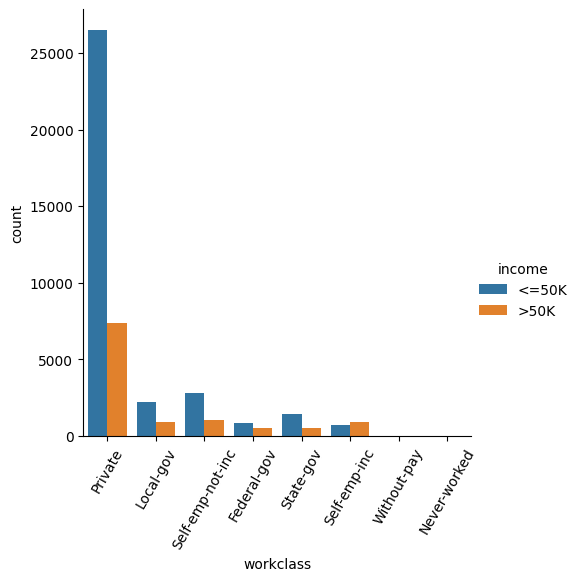

In [154]:

# Ahora segregamos los datos en función de la varaible target (income).

sns.catplot(x="workclass", hue="income", kind="count", data=df_adult)
plt.xticks(rotation=60)

df_workclass_e_ingreso = df_adult.groupby(['workclass','income']).size().unstack(fill_value=0).reset_index()
df_workclass_e_ingreso

In [155]:
# Observamos una moda con la mayoría de los datos en la misma, esto puede ser útil para utilizarlo como valor para reemplazar los datos 
# faltantes que tiene la columna. Por otra parte, puede realizarse una transformación realizando una union de las columnas con menor cantidad
# de frecuencia.

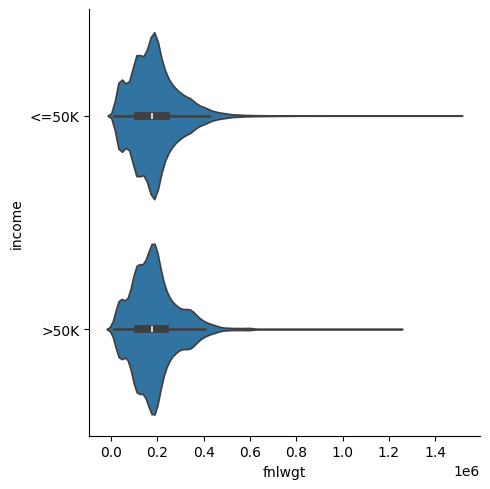

In [156]:
# Analizamos la variable 'fnlwgt', realizaremos un grafico violin para ver la distribución de los datos con el parametro de ingreso
# como comparativo, para ver si la distribución de los valores tiene alguna incidencia sobre la variable target.

sns.catplot(x="fnlwgt", y="income", kind="violin", split=False, data=df_adult)

In [157]:
# Se observa una relación similar en cuanto a la distribución de los individuos en relación al valor fnlwgt y su ingreso, por lo que 
# la variable no aprota ningún dato para poder concluir que afecte a la variable target. Podemos descartar esta columna de la tabla.

In [158]:
# A continuación analizaremos dos variables que por el nombre de la variable y el sentido que tienen, puede suponerse que exista una
# correlación alta entre las mismas, estas son education y educational-num.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Doctorate'),
  Text(1, 0, 'Prof-school'),
  Text(2, 0, 'Masters'),
  Text(3, 0, 'Bachelors'),
  Text(4, 0, 'Assoc-acdm'),
  Text(5, 0, 'Assoc-voc'),
  Text(6, 0, 'Some-college'),
  Text(7, 0, 'HS-grad'),
  Text(8, 0, '12th'),
  Text(9, 0, '11th'),
  Text(10, 0, '10th'),
  Text(11, 0, '9th'),
  Text(12, 0, '7th-8th'),
  Text(13, 0, '5th-6th'),
  Text(14, 0, '1st-4th'),
  Text(15, 0, 'Preschool')])

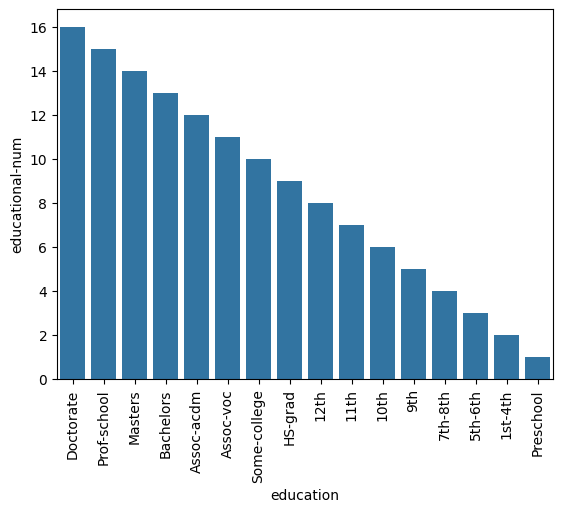

In [159]:
df_educationNum_sort = df_adult.sort_values(by='educational-num',ascending=False)

sns.barplot(x=df_educationNum_sort['education'],y=df_educationNum_sort['educational-num'],data=df_adult)
plt.xticks(rotation=90)

In [160]:
df_educationNum_sort

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
34838,68,Self-emp-not-inc,89011,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,Canada,<=50K
9892,33,Private,192644,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,90,United-States,>50K
42254,51,Local-gov,166461,Doctorate,16,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,United-States,>50K
42257,63,<NA>,133166,Doctorate,16,Married-civ-spouse,<NA>,Husband,White,Male,0,0,12,United-States,<=50K
29118,69,State-gov,203072,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16505,53,Local-gov,140359,Preschool,1,Never-married,Machine-op-inspct,Not-in-family,White,Female,0,0,35,United-States,<=50K
32843,46,Private,225065,Preschool,1,Married-civ-spouse,Machine-op-inspct,Wife,White,Female,0,0,40,Mexico,<=50K
13582,43,Self-emp-not-inc,245056,Preschool,1,Married-civ-spouse,Transport-moving,Husband,Black,Male,0,0,40,Haiti,<=50K
48079,31,State-gov,77634,Preschool,1,Never-married,Other-service,Not-in-family,White,Male,0,0,24,United-States,<=50K


In [161]:
# analizamos la frecuencia de cada valor de la variable 'educational-num'

df_adult['educational-num'].value_counts().reset_index()

,educational-num,count
0,9,15784
1,10,10878
2,13,8025
3,14,2657
4,11,2061
5,7,1812
6,12,1601
7,6,1389
8,4,955
9,15,834


In [162]:
# Se confirma lo que se había supuesto antes de realizar el analisis grafico, acompañado de la creación del dataframe para realizarlo.
# Podemos precindir de la utilización de una de las columnas, en este caso solo nos quedaremos con la variable 'educational-num'
# por el tipo de dato numerico que nos es de mayor utilidad para su estudio.
# Observando la frecuencia de cada valor podemos indicar que es factible eliminar las filas con frecuencia baja.
# A su vez podemos realizar un grafico que nos muestre como es la relación de la variable elegida con la variable target.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12'),
  Text(12, 0, '13'),
  Text(13, 0, '14'),
  Text(14, 0, '15'),
  Text(15, 0, '16')])

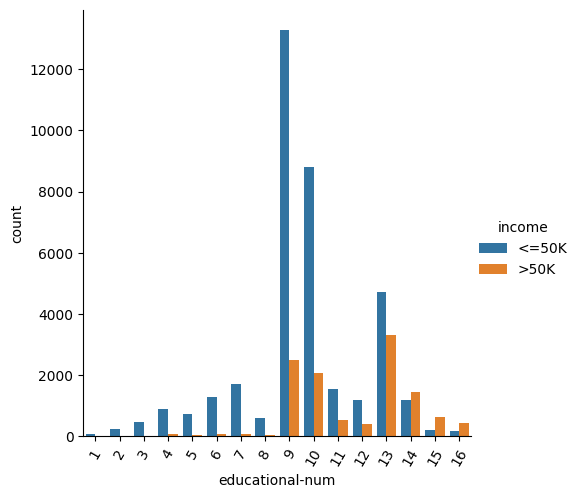

In [163]:
sns.catplot(x="educational-num", hue="income", kind="count", data=df_adult)
plt.xticks(rotation=60)

In [164]:
# Se visualiza una relación creciente en el ingreso a medida que aumenta el valor de 'educational-num'. Se observa como aumenta la frecuencia
# hacia mayores ingresos a medida que aumenta el nivel educativo del individuo.

Text(0, 0.5, 'Nivel numerico de educación')

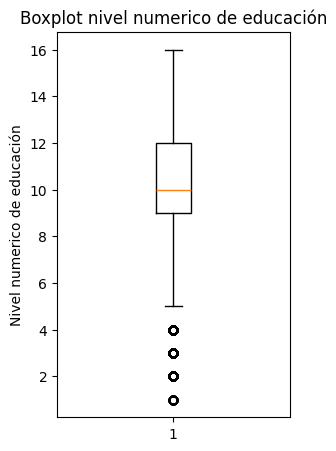

In [165]:
# Por ultimo para verificar por completo la posibilidad de eliminar los valores bajos de educación elaboramos un boxplot para examinar
# outliers.

fig, ax = plt.subplots(figsize = (3,5))
ax.boxplot(df_adult['educational-num'])
ax.set_title('Boxplot nivel numerico de educación')
ax.set_ylabel('Nivel numerico de educación')


In [166]:
# Observando la grafica podría ser una buena decisión eliminar las filas de individuos con nivel de educación menor o igual que 4.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Black'),
  Text(1, 0, 'White'),
  Text(2, 0, 'Asian-Pac-Islander'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Amer-Indian-Eskimo')])

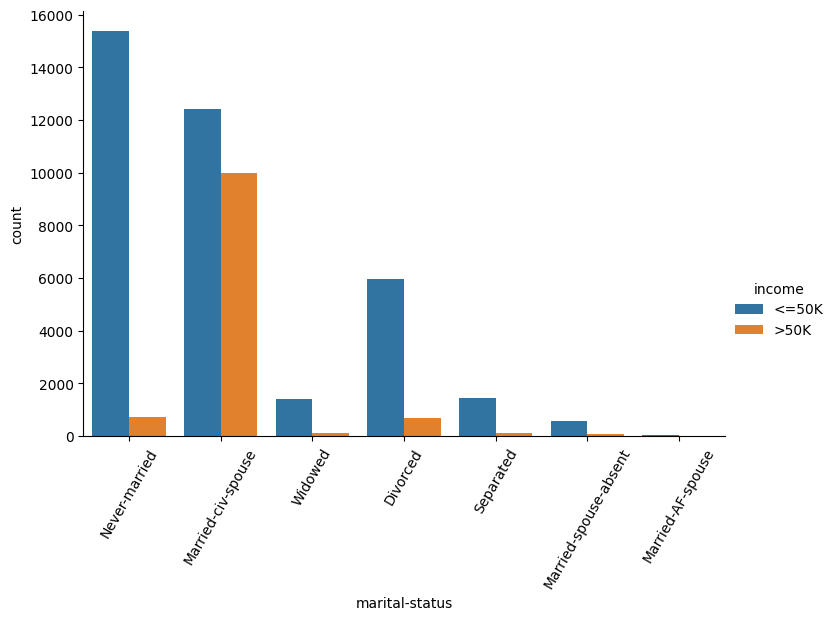

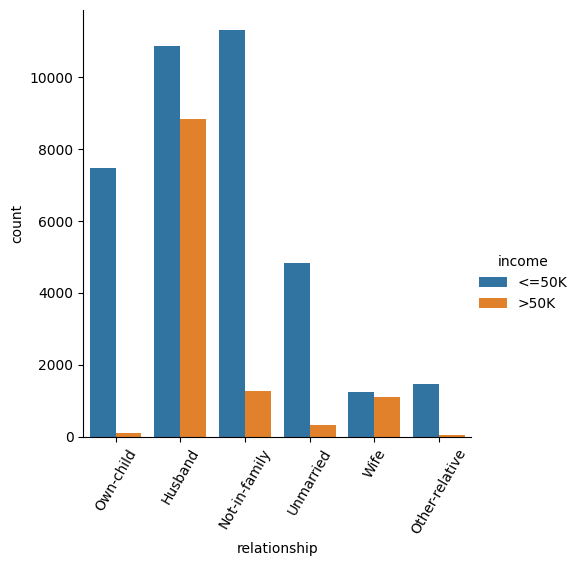

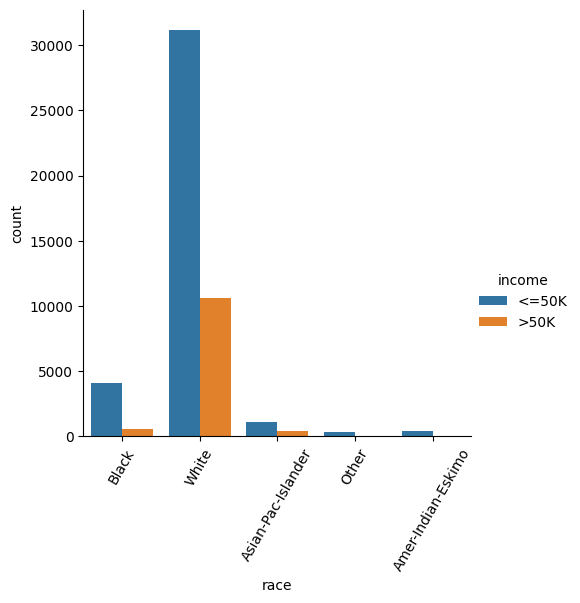

In [167]:
# Analizamos las variables categoricas 'marital-status', 'relationship', 'race'. Haremos graficos que relacionen directamente con la 
# variable target. Se realizan juntos por ser variables categoricas y no tener valores faltantes.

sns.catplot(x='marital-status', hue="income", kind="count", data=df_adult, aspect=1.5)
plt.xticks(rotation=60)

sns.catplot(x='relationship', hue="income", kind="count", data=df_adult)
plt.xticks(rotation=60)

sns.catplot(x='race', hue="income", kind="count", data=df_adult)
plt.xticks(rotation=60)




In [168]:
df_adult['marital-status'].value_counts().reset_index()

,marital-status,count
0,Married-civ-spouse,22379
1,Never-married,16117
2,Divorced,6633
3,Separated,1530
4,Widowed,1518
5,Married-spouse-absent,628
6,Married-AF-spouse,37


In [169]:
df_adult['relationship'].value_counts().reset_index()

,relationship,count
0,Husband,19716
1,Not-in-family,12583
2,Own-child,7581
3,Unmarried,5125
4,Wife,2331
5,Other-relative,1506


In [170]:
df_adult['race'].value_counts().reset_index()

,race,count
0,White,41762
1,Black,4685
2,Asian-Pac-Islander,1519
3,Amer-Indian-Eskimo,470
4,Other,406


In [171]:
# Las tres variables categoricas tienen una relación según sus categorías con la variable income.
# Puede realizarse transformación en la variable 'marital-status' para disminuir la cantidad de categorías y unir Widowed, Married-spouse-absent,
# Married-AF-spouse en una sola categoría unica que podria llamarse 'other'.
# La variable race tiene una moda elebada pero aún asi se cree importante tener todas sus categorías.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13],
 [Text(0, 0, 'Machine-op-inspct'),
  Text(1, 0, 'Farming-fishing'),
  Text(2, 0, 'Protective-serv'),
  Text(3, 0, 'Other-service'),
  Text(4, 0, 'Prof-specialty'),
  Text(5, 0, 'Craft-repair'),
  Text(6, 0, 'Adm-clerical'),
  Text(7, 0, 'Exec-managerial'),
  Text(8, 0, 'Tech-support'),
  Text(9, 0, 'Sales'),
  Text(10, 0, 'Priv-house-serv'),
  Text(11, 0, 'Transport-moving'),
  Text(12, 0, 'Handlers-cleaners'),
  Text(13, 0, 'Armed-Forces')])

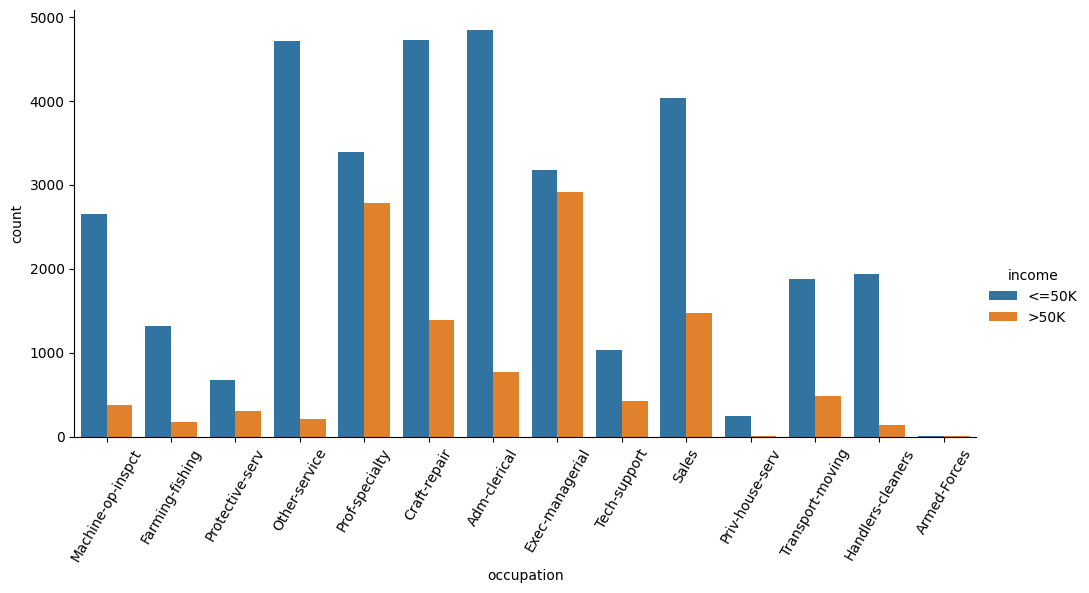

In [172]:
# Analizamos graficamente la variable 'occupation'.

sns.catplot(x='occupation', hue="income", kind="count", data=df_adult, aspect=2)
plt.xticks(rotation=60)

In [173]:
# La variable presenta relaión de ifluencia sobre la variable income. No se cree necesario realizar una transformación. Los valores faltantes
# de la columna se pueden reemplazar por la moda, es la categoría Prof-specialty.

In [174]:
# Analizamos la variable native-country. Del analisis de descripción de las variables categoricas sabemos que tiene una moda con un % de 
# frecuencia muy alto, por lo que puede suponerse que haremos dos cambios en dicha variable, reemplazr los faltantes por el valor de la 
# moda y a su vez, transformar las categorías diferentes a la moda en una sola.
# Realizamos algunas practicas para analizar el caso y luego graficamos para concluir.

df_adult['native-country'].value_counts().reset_index()


,native-country,count
0,United-States,43832
1,Mexico,951
2,Philippines,295
3,Germany,206
4,Puerto-Rico,184
5,Canada,182
6,El-Salvador,155
7,India,151
8,Cuba,138
9,England,127


In [175]:
# Los datos de la tabla avalan la decisión de poder transformar los nulos en la moda. Por otra parte las variables categoricas que tenía datos
# faltantes tambien podían solucionarse de la misma forma, por lo que se prosede a realizar el cambio en el dataframe original, convirtiendo
# los datos faltantes en la moda para cada variable con flatantes.
# A su vez podemos tambien justificar la decisión de transformar las categorías diferentes a la moda y agruparlas en una sola.

In [176]:
# Se reemplaza valores faltantes por la moda.

moda = df_adult.mode().iloc[0]
df_adult = df_adult.fillna(moda)
df_adult.describe(exclude=[np.number])

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,36705,15784,22379,8981,19716,41762,32650,44689,37155


In [177]:
# Se transforman las categorías de la variable 'native-country'.

df_adult.loc[df_adult['native-country']!='United-States', 'native-country'] = 'other_country'

In [178]:
# Generamos una nueva tabla con la segregación de ingreso según la variable native-country

df_NativeCountry_e_ingreso = df_adult.groupby(['native-country','income']).size().unstack(fill_value=0).reset_index()
df_NativeCountry_e_ingreso

income,native-country,<=50K,>50K
0,United-States,33775,10914
1,other_country,3380,773


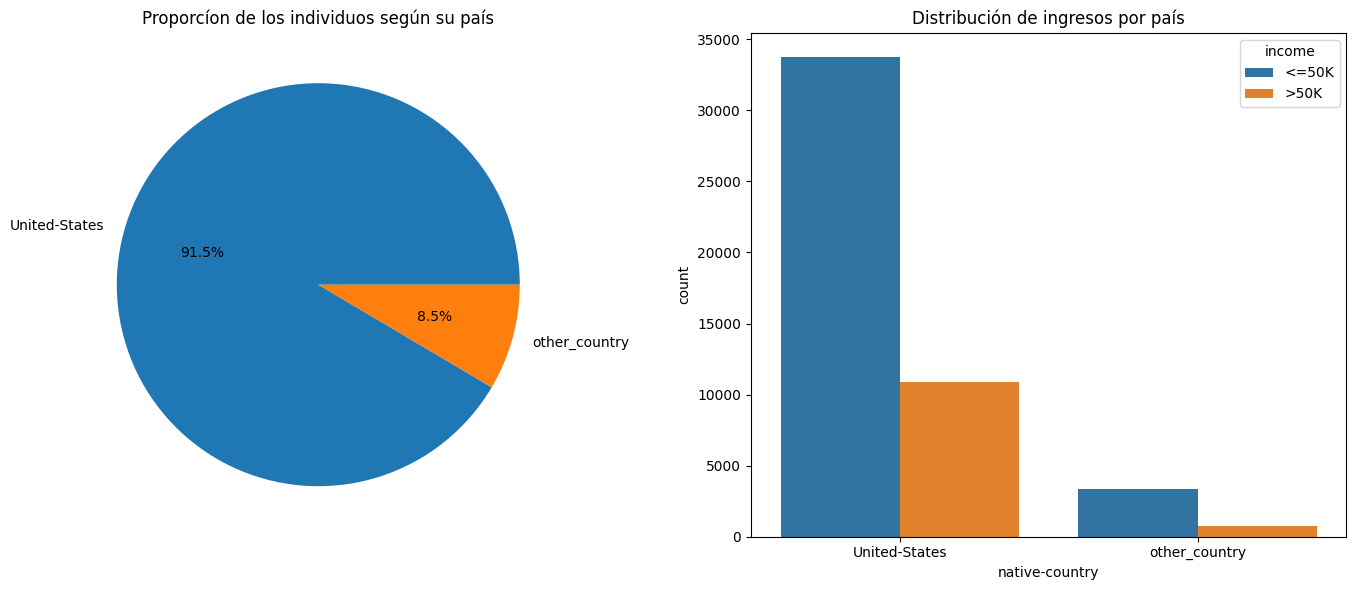

In [179]:
# Graficamos la distribución de los datos en native-country.

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.pie(df_adult['native-country'].value_counts(), labels=df_adult['native-country'].value_counts().index, autopct='%1.1f%%')
ax1.set_title('Proporcíon de los individuos según su país')

sns.countplot(x='native-country', hue="income", data=df_adult, ax=ax2)
ax2.set_title('Distribución de ingresos por país')

plt.tight_layout()

In [180]:
# Existe relación entre la variable analizada y la variable target.

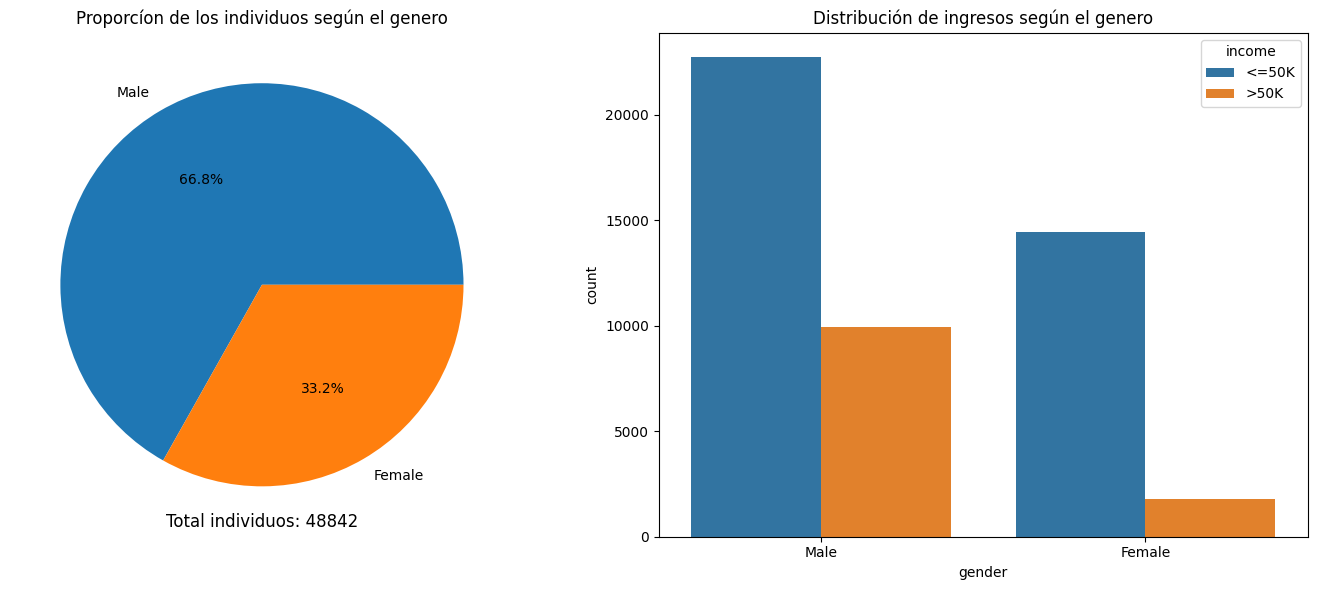

In [181]:
# A continuación se evalúa la variable 'gender'. Es una variable binaria, es muy parecido al caso que nos presenta native-country luego de
# haber realizado la transformación de los datos. Analizamos graficamente.

total_muestra = df_adult['gender'].count()
leyenda_grafico_torta = f'Total individuos: {total_muestra}'

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))
ax1.pie(df_adult['gender'].value_counts(), labels=df_adult['gender'].value_counts().index, autopct='%1.1f%%')
ax1.set_title('Proporcíon de los individuos según el genero')
ax1.text(0, -1.2, leyenda_grafico_torta, fontsize=12, ha='center')

sns.countplot(x='gender', hue="income", data=df_adult, ax=ax2)
ax2.set_title('Distribución de ingresos según el genero')

plt.tight_layout()

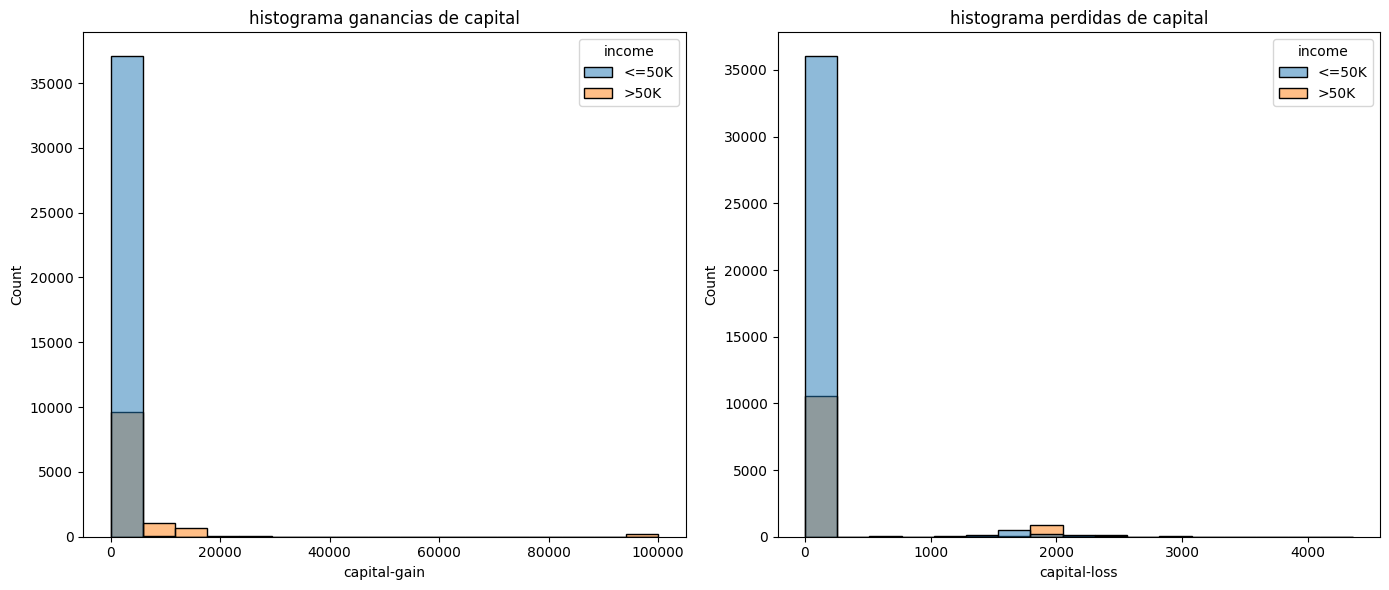

In [182]:
# A continuación analizaremos las variables 'capital-gain' y 'capital-loss'. En principio se puede suponer que ambas estan hablando de algo
# similar, ya que describen el capital del individuo, ya sea una ganancia o una perdida. Se generaran graficas que ayuden
# a comprenderlas.

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(14,6))

sns.histplot(x='capital-gain', hue="income", data=df_adult, ax=ax1)
ax1.set_title('histograma ganancias de capital')
sns.histplot(x='capital-loss', hue="income", data=df_adult, ax=ax2)
ax2.set_title('histograma perdidas de capital')

plt.tight_layout()



In [ ]:
# Puede notarse algun patrón de relacion, cuando un individuo tienen ganancias de capital tiende a tener ingresos mayores a 50k, cuando
# un individuo tiene perdidas de capital tiende a tener ingresos menoresa 50k. Por otra parte en perdidas de capital hay un rango en que 
# los individuos obtienen ingresos superiores y tienen perdidas entre 1800/2000. Si bien el modelo se verá en desventaja por tener 
# mayor cantidad de variables que analizar, se considera prudente dejar ambas columnas por separado, entendiendo que tienen incidencias 
# sobre la variable target que es mejor que sean introducidas al modelo por separado.

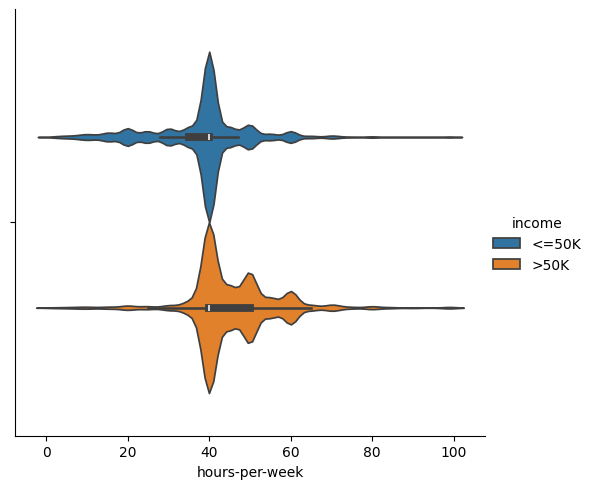

In [201]:
# Por último se anlaiza la variable hour-per-week

sns.catplot(x='hours-per-week',hue='income',kind='violin', data=df_adult)

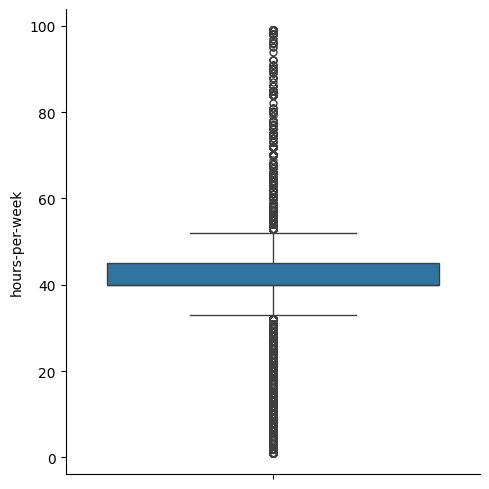

In [203]:
# Se observa una relación entre las horas trabajadas por semana y el ingreso de las personas. Se explorará la existencia de outliers con un
# boxplot para analizar su posible eliminación de esos valores de la columna.

sns.catplot(y='hours-per-week',kind='box', data=df_adult)

In [205]:
# Se observa que existen outliers. La variable indica la cantidad de horas por semana trabajadas, por lo que podria establecerse un limite
# a criterio personal de que las personas no pueden trabajar mas de 70 hs por semana y en general no trabaja menos de 10 hs por semana.
# Identifiquemos que frecuencia tienen esos limites.

df_adult.value_counts(df_adult['hours-per-week']>=70)

hours-per-week
False    47631
True      1211
Name: count, dtype: int64

In [206]:
df_adult.value_counts(df_adult['hours-per-week']<10)

hours-per-week
False    48142
True       700
Name: count, dtype: int64

In [ ]:
# Se podría eliminar estos valores sin alterar significativamente la cantidad de filas por ende sin alterar los resultados 
# que surjan de la predicción de un futuro modelo de predicción de ingresos.

In [ ]:
# CONCLUCIONES:

# - Puede eliminarse la variable 'fnlwgt' ya que no aporta información relevante para el modelo de predecir el ingreso

# - Los datos nulos de las variables 'workclass', 'occupation' y 'native-country' se reemplazan por la moda de cada variable.

# - En la variable 'native-country' se realiza la transformación de los países diferentes a 'United-States' por su baja frecuencia y se
#   las agrupa en una sola llamda 'other_country'

# - En la variable 'marita-status' se puede realizar una transformación para agrupar las categorías de baja frecuencia.

# - En la variable 'workclass' se puede realizar una transformación para agrupar las categorías de baja frecuencia.

# - Se elimina la columna 'education' ya que brinda la misma información que 'educational-num'ArithmeticError

# - Se pueden eliminar las filas con valores menores o iguales que 4 de la variable 'educational-num' por su baja frecuencia y estar en rangos
#   de valores atípicos.

# - Se pueden eliminar las filas con valores menores o iguales a 10 y mayores o iguales a 70 de la variable 'hours-per-week' dada su baja
#   frecuencia y entder que son valores outliers entre los datos.